Возьмите датасет с отключением клиентов от телефонной компании.

Подготовьте данные для решения задачи.

Решите задачу с помощью нейронной сети, используя слои Dense как мы делали на уроке.

Ваша задача правильно написать “голову” сети и подобрать правильно loss функцию.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [6]:
test_df.head(6)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [7]:
train_numerical_features = train_df.select_dtypes(include=['float64', 'int64'])
test_numerical_features = train_df.select_dtypes(include=['float64', 'int64'])

In [8]:
mean_values = train_numerical_features.mean()
min_values = train_numerical_features.min()
max_values = train_numerical_features.max()

In [9]:
# центрирование данных
train_centered_data = train_numerical_features - mean_values
test_centered_data = test_numerical_features - mean_values

In [10]:
# нормализация данных
train_df_norm = (train_centered_data - min_values) / (max_values - min_values)
test_df_norm = (test_centered_data - min_values) / (max_values - min_values)

In [11]:
train_df[train_numerical_features.columns] = train_df_norm
test_df[test_numerical_features.columns] = test_df_norm

In [12]:
train_df['International plan'] = train_df['International plan'].map({'No':0, 'Yes':1})
train_df['Voice mail plan'] = train_df['Voice mail plan'].map({'No':0, 'Yes':1})
test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})

In [13]:
X_train = train_df.drop(['State', 'Account length', 'Area code' , 'Churn'], axis = 1)
Y_train = train_df['Churn'].astype(int)
X_test = test_df.drop(['State', 'Account length', 'Area code' , 'Churn'], axis = 1)
Y_test = test_df['Churn'].astype(int)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape = (16,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [15]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=10, batch_size=256)

Epoch 1/10
11/11 [==============================] - 2s 31ms/step - loss: 0.6476 - accuracy: 0.7089 - val_loss: 0.5955 - val_accuracy: 0.8576
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 0.5599 - accuracy: 0.8515 - val_loss: 0.5138 - val_accuracy: 0.8576
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 0.4902 - accuracy: 0.8545 - val_loss: 0.4533 - val_accuracy: 0.8576
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 0.4434 - accuracy: 0.8545 - val_loss: 0.4231 - val_accuracy: 0.8576
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: 0.4074 - accuracy: 0.8545 - val_loss: 0.4175 - val_accuracy: 0.8576
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 0.4012 - accuracy: 0.8545 - val_loss: 0.4182 - val_accuracy: 0.8576
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3917 - accuracy: 0.8545 - val_loss: 0.4173 - val_accuracy: 0.8576
Epoch 8/10
11/11 [=

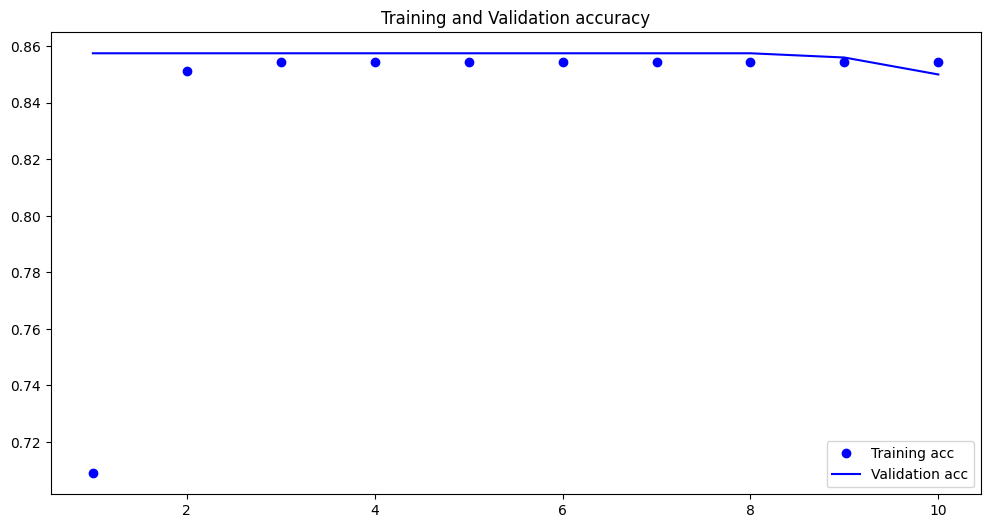

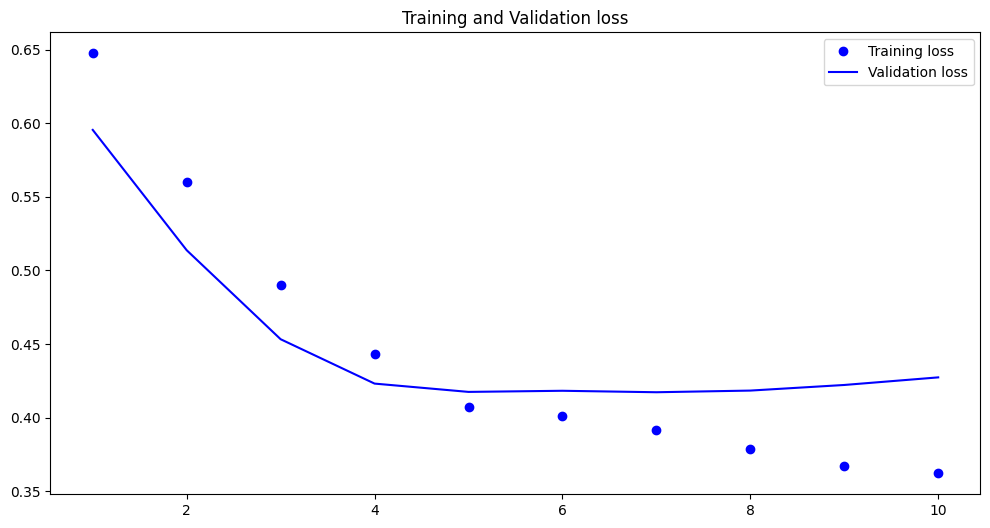

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()